## 1. Обнаружение пропусков в DataFrame

#### 1.1 Метод .isna() эквивалент .isnull()

In [52]:
import pandas as pd
import numpy as np

data = {
    "Имя": ["Анна", "Иван", None, None, "Мария"],
    "Возраст": [25, 30, None, 40, 35],
    "Город": ["Москва", None, "Казань", "Новосибирск", "СПб"]
}

df = pd.DataFrame(data)
print(df)

     Имя  Возраст        Город
0   Анна     25.0       Москва
1   Иван     30.0         None
2   None      NaN       Казань
3   None     40.0  Новосибирск
4  Мария     35.0          СПб


In [27]:
print(df.isna())

     Имя  Возраст  Город
0  False    False  False
1  False    False   True
2   True     True  False
3   True    False  False
4  False    False  False


#### 1.2. Метод .notna() (эквивалент .notnull())

In [29]:
print(df.notna())

     Имя  Возраст  Город
0   True     True   True
1   True     True  False
2  False    False   True
3  False     True   True
4   True     True   True


#### 1.3. Визуализация пропусков с msno.matrix()

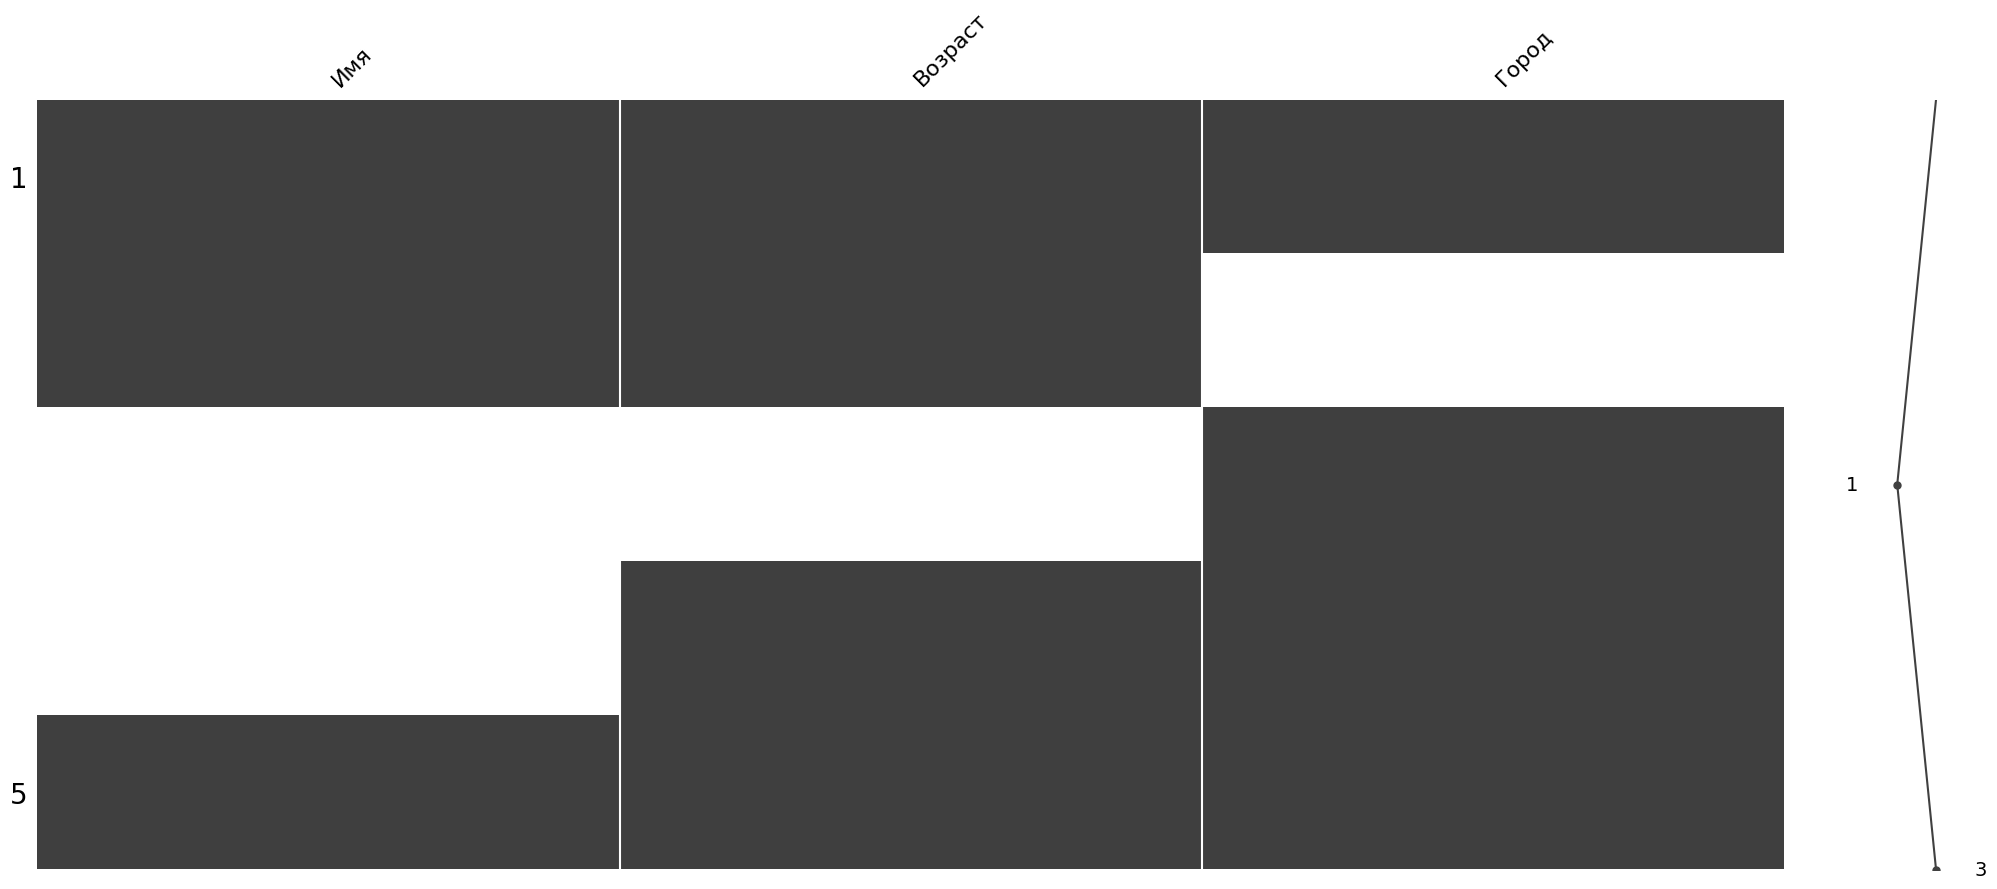

In [31]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
plt.show()

#### 1.4. Бар-график пропусков msno.bar()

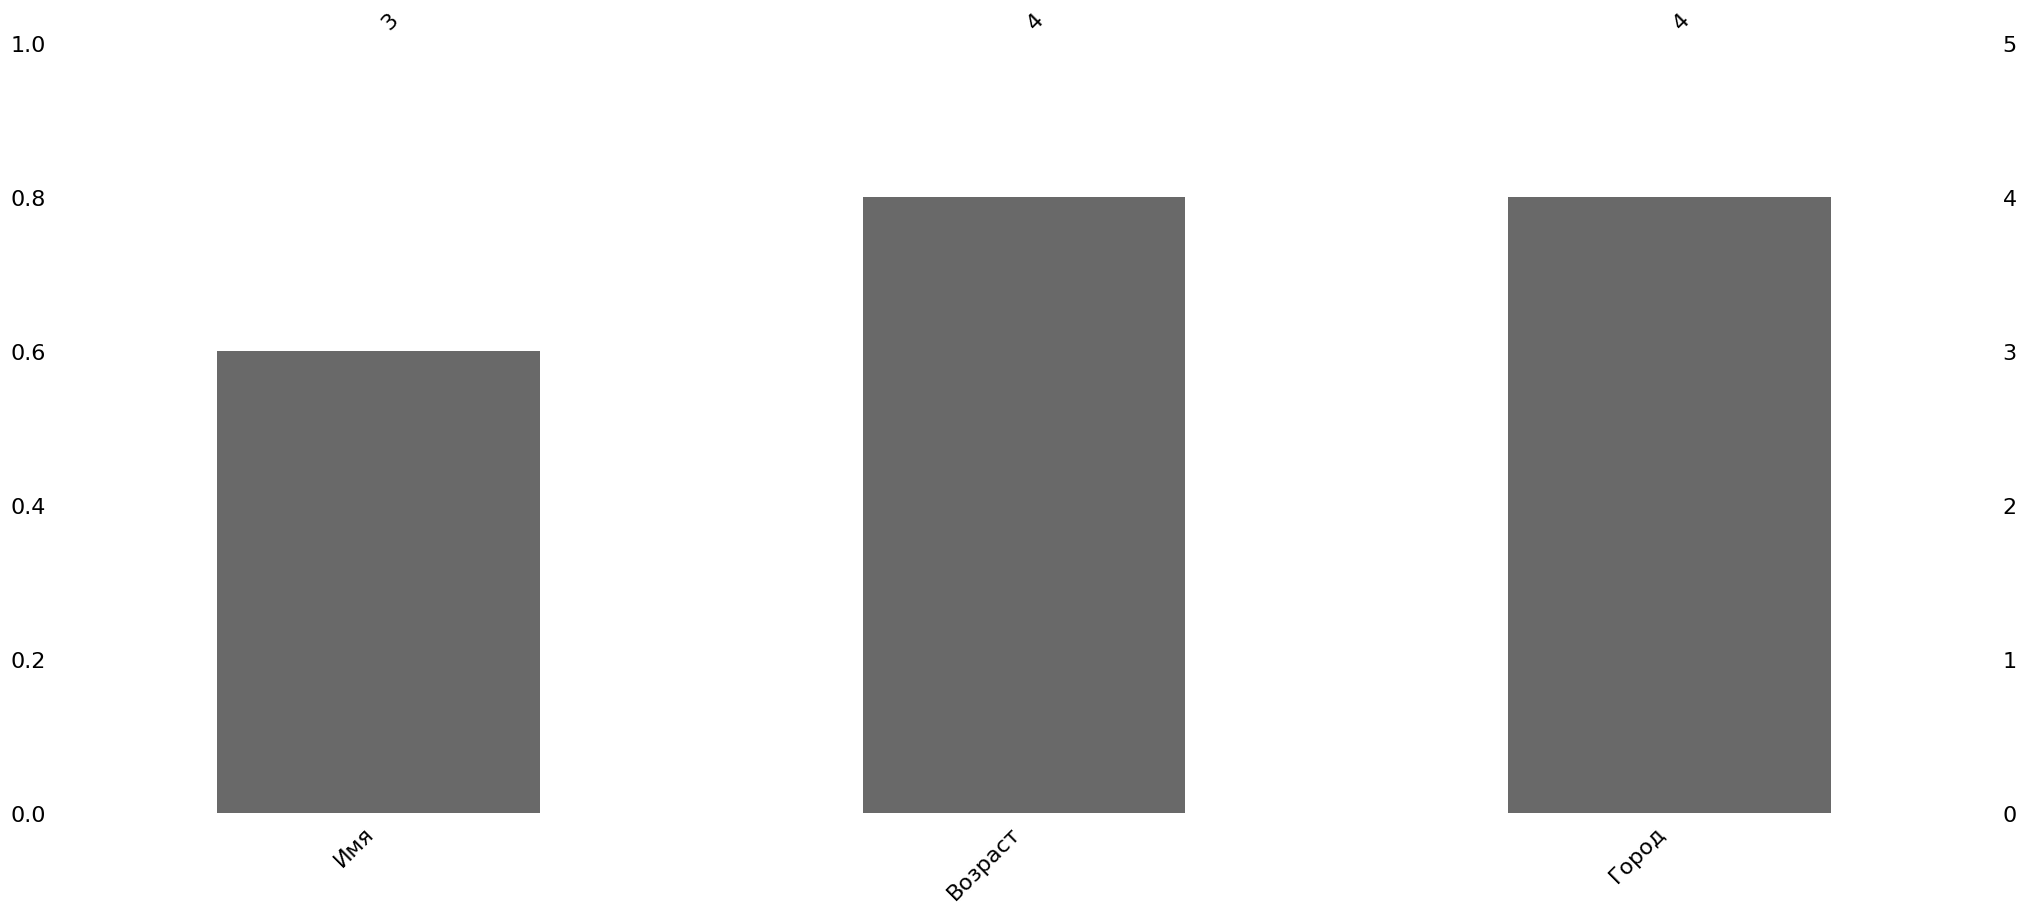

In [33]:
msno.bar(df)
plt.show()

#### 1.5. Тепловая карта пропусков msno.heatmap()

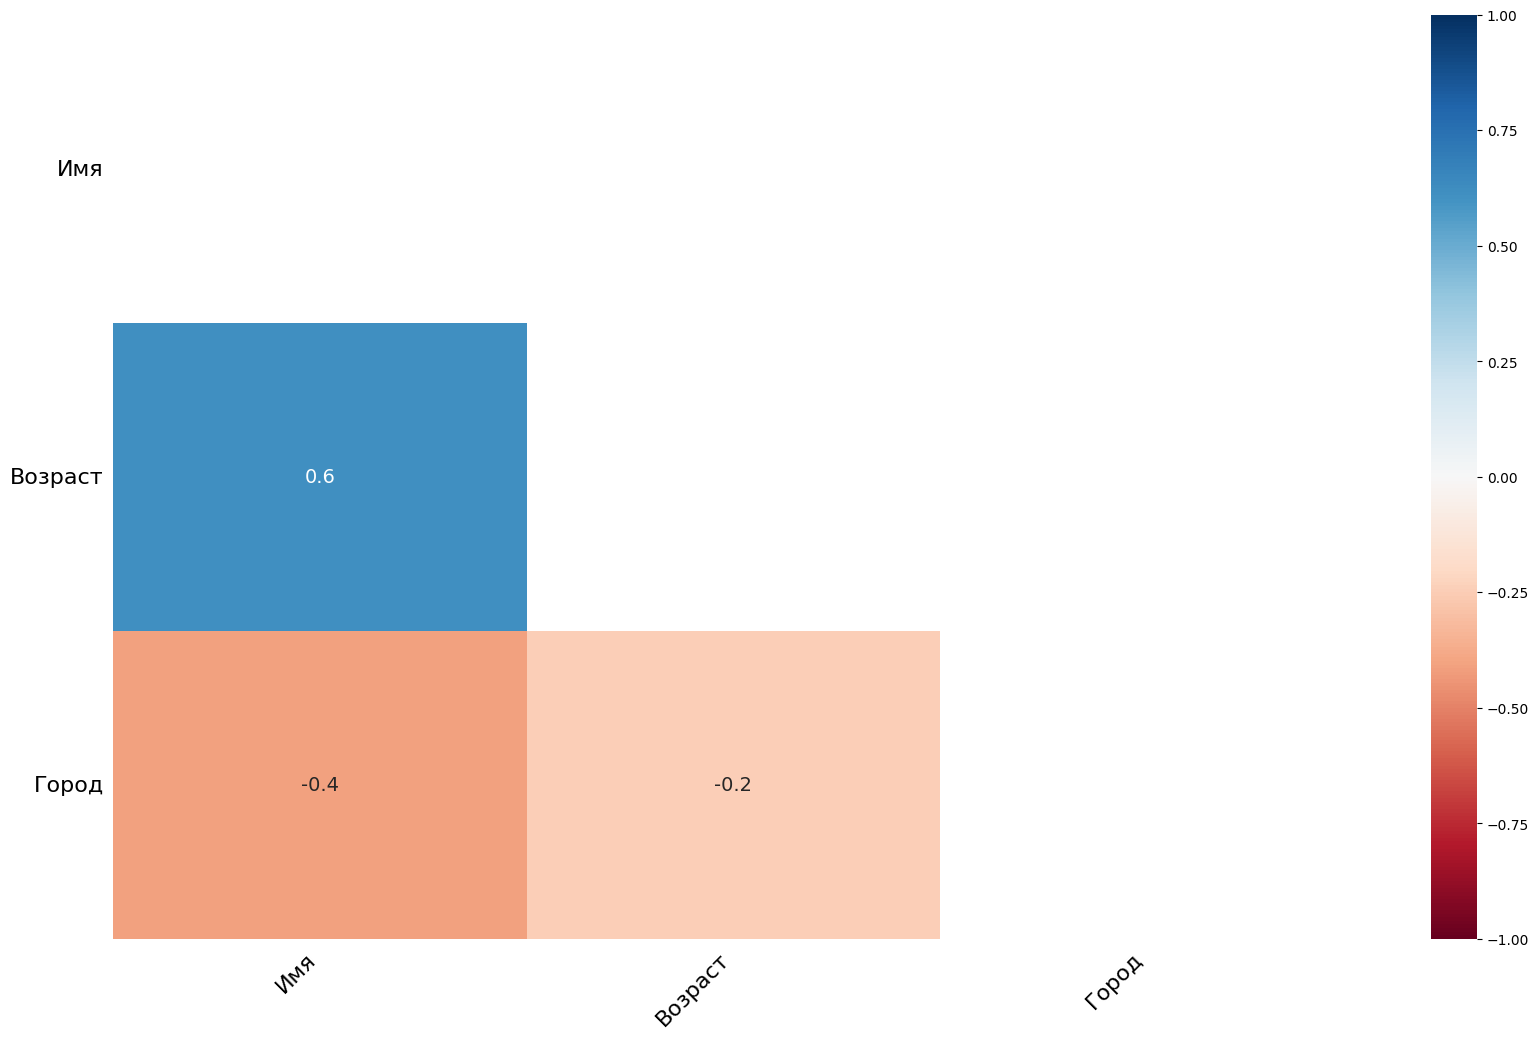

In [36]:
msno.heatmap(df)
plt.show()

## 2. Удаление пропущенных значений в DataFrame

#### 2.1. Удаление строк с пропусками (dropna())

In [39]:
df_cleaned = df.dropna()
print(df_cleaned)

     Имя  Возраст   Город
0   Анна     25.0  Москва
4  Мария     35.0     СПб


#### 2.2. Удаление строк, где все значения NaN (how="all")

In [45]:
df_cleaned = df.dropna(how="all")
print(df_cleaned)

# если строка полностью состоит из NaN удаляем её

     Имя  Возраст        Город
0   Анна     25.0       Москва
1   Иван     30.0         None
2   None      NaN       Казань
3   None     40.0  Новосибирск
4  Мария     35.0          СПб


#### 2.3. Удаление столбцов с пропусками (dropna(axis=1))

In [48]:
df_cleaned = df.dropna(axis=1)
print(df_cleaned)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


#### 2.4. Удаление строк, где меньше 3 непустых значений (thresh)

In [52]:
df_cleaned = df.dropna(thresh=3)
print(df_cleaned)

     Имя  Возраст   Город
0   Анна     25.0  Москва
4  Мария     35.0     СПб


#### 2.5. Удаление столбцов, где меньше 4 непустых значений

In [55]:
df_cleaned = df.dropna(axis=1, thresh=4)
print(df_cleaned)

   Возраст        Город
0     25.0       Москва
1     30.0         None
2      NaN       Казань
3     40.0  Новосибирск
4     35.0          СПб


## 3. Заполнение пропусков в DataFrame

#### 3.1. Заполнение константами с помощью .fillna()

In [60]:
df["Возраст"] = df["Возраст"].fillna(30)
print(df)

     Имя  Возраст        Город
0   Анна     25.0       Москва
1   Иван     30.0         None
2   None     30.0       Казань
3   None     40.0  Новосибирск
4  Мария     35.0          СПб


#### 3.2. Заполнение статистическими мерами (среднее значение (mean))

In [71]:
mean_value = df["Возраст"].mean()
df["Возраст"] = df["Возраст"].fillna(mean_value)

#### 3.3. Заполнение статистическими мерами (медиана (median))

In [78]:
median_value = df["Возраст"].median()
df["Возраст"] = df["Возраст"].fillna(median_value)

#### 3.4. Заполнение статистическими мерами (мода (mode))

In [85]:
mode_value = df["Город"].mode()[0]
df["Город"] = df["Город"].fillna(mode_value)
print(df)

     Имя  Возраст        Город
0   Анна     25.0       Москва
1   Иван     30.0       Казань
2   None      NaN       Казань
3   None     40.0  Новосибирск
4  Мария     35.0          СПб


#### 3.5. Пропагирование значений (метод ffill)

In [7]:
df["Возраст"] = df["Возраст"].ffill()
print(df)

     Имя  Возраст        Город
0   Анна     25.0       Москва
1   Иван     30.0         None
2   None     30.0       Казань
3   None     40.0  Новосибирск
4  Мария     35.0          СПб


#### 3.6. Пропагирование значений (метод bfill)

In [11]:
df["Возраст"] = df["Возраст"].bfill()
print(df)

     Имя  Возраст        Город
0   Анна     25.0       Москва
1   Иван     30.0         None
2   None     40.0       Казань
3   None     40.0  Новосибирск
4  Мария     35.0          СПб


#### 3.7. Комбинирование подходов

In [15]:
df["Возраст"] = df["Возраст"].ffill().bfill()
print(df)

     Имя  Возраст        Город
0   Анна     25.0       Москва
1   Иван     30.0         None
2   None     30.0       Казань
3   None     40.0  Новосибирск
4  Мария     35.0          СПб


#### 3.8. Ограничение количества заполнений

In [21]:
df["Возраст"] = df["Возраст"].ffill(limit=1)
print(df)

     Имя  Возраст        Город
0   Анна     25.0       Москва
1   Иван     30.0         None
2   None     30.0       Казань
3   None     40.0  Новосибирск
4  Мария     35.0          СПб


## 4. Интерполяция пропущенных значений в DataFrame с помощью .interpolate()

#### 4.1. Линейная интерполяция

In [54]:
df = pd.DataFrame({
    "день": [1, 2, 3, 4, 5],
    "температура": [20.0, np.nan, np.nan, 24.0, 25.0]
})
df["температура_interp"] = df["температура"].interpolate()
print(df)

   день  температура  температура_interp
0     1         20.0           20.000000
1     2          NaN           21.333333
2     3          NaN           22.666667
3     4         24.0           24.000000
4     5         25.0           25.000000


#### 4.2. Полиномиальная интерполяция

In [61]:
df["температура_poly"] = df["температура"].interpolate(method="polynomial", order=2)
print(df)

   день  температура  температура_interp  температура_poly
0     1         20.0           20.000000         20.000000
1     2          NaN           21.333333         21.500000
2     3          NaN           22.666667         22.833333
3     4         24.0           24.000000         24.000000
4     5         25.0           25.000000         25.000000


#### 4.3. Интерполяция временных рядов (method='time')

In [64]:
dates = pd.date_range("2024-01-01", periods=5, freq="D")
df = pd.DataFrame({
"дата": dates,
"уровень воды": [1.2, np.nan, np.nan, 1.8, 2.0]
})
df.set_index("дата", inplace=True)
df["интерполяция"] = df["уровень воды"].interpolate(method="time")
print(df)

            уровень воды  интерполяция
дата                                  
2024-01-01           1.2           1.2
2024-01-02           NaN           1.4
2024-01-03           NaN           1.6
2024-01-04           1.8           1.8
2024-01-05           2.0           2.0


## 5. Обработка выбросов в pandas

In [70]:
import pandas as pd
import numpy as np
data = {
"Имя": ["Анна", "Иван", "Ольга", "Петр", "Мария", "Дмитрий",
"Елена"],
"Баланс на счете": [50000, 60000, 45000, 30000, 65000, 150000,200000]
}
df = pd.DataFrame(data)
print(df)

       Имя  Баланс на счете
0     Анна            50000
1     Иван            60000
2    Ольга            45000
3     Петр            30000
4    Мария            65000
5  Дмитрий           150000
6    Елена           200000


#### 5.1. Удаление выбросов по межквартильному размаху (IQR)

In [73]:
Q1 = df["Баланс на счете"].quantile(0.25)
Q3 = df["Баланс на счете"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df_removed = df[(df["Баланс на счете"] >= lower) & (df["Баланс на счете"] <= upper)]
print(df_removed)

       Имя  Баланс на счете
0     Анна            50000
1     Иван            60000
2    Ольга            45000
3     Петр            30000
4    Мария            65000
5  Дмитрий           150000


#### 5.2. Обрезка значений с помощью clip()

In [76]:
df_clipped = df.copy()
df_clipped["Баланс на счете"] = df["Баланс на счете"].clip(lower,
upper)
print(df_clipped)

       Имя  Баланс на счете
0     Анна            50000
1     Иван            60000
2    Ольга            45000
3     Петр            30000
4    Мария            65000
5  Дмитрий           150000
6    Елена           197500


#### 5.3. Логарифмическое преобразование

In [80]:
df_log = df.copy()
df_log["Лог баланс"] = np.log1p(df["Баланс на счете"])
print(df_log[["Имя", "Баланс на счете", "Лог баланс"]])

       Имя  Баланс на счете  Лог баланс
0     Анна            50000   10.819798
1     Иван            60000   11.002117
2    Ольга            45000   10.714440
3     Петр            30000   10.308986
4    Мария            65000   11.082158
5  Дмитрий           150000   11.918397
6    Елена           200000   12.206078


## 6. Стандартизация признаков

In [85]:
import pandas as pd
data = {
"Имя": ["Анна", "Иван", "Ольга", "Петр", "Мария"],
"Возраст": [25, 30, 22, 40, 35],
"Зарплата": [50000, 60000, 45000, 70000, 65000]
}
df = pd.DataFrame(data)
print(df)

     Имя  Возраст  Зарплата
0   Анна       25     50000
1   Иван       30     60000
2  Ольга       22     45000
3   Петр       40     70000
4  Мария       35     65000


#### 6.1. Ручная стандартизация средствами pandas

In [88]:
df_standardized = df.copy()
df_standardized["Возраст"] = (df["Возраст"] - df["Возраст"].mean()) / df["Возраст"].std()
df_standardized["Зарплата"] = (df["Зарплата"] - df["Зарплата"].mean()) / df["Зарплата"].std()
print(df_standardized)

     Имя   Возраст  Зарплата
0   Анна -0.739657 -0.771589
1   Иван -0.054789  0.192897
2  Ольга -1.150577 -1.253831
3   Петр  1.314945  1.157383
4  Мария  0.630078  0.675140


#### 6.2. Стандартизация с использованием StandardScaler

In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[["Возраст", "Зарплата"]])

df_scaled = df.copy()
df_scaled[["Возраст", "Зарплата"]] = scaled_values
print(df_scaled)

     Имя   Возраст  Зарплата
0   Анна -0.826961 -0.862662
1   Иван -0.061256  0.215666
2  Ольга -1.286384 -1.401826
3   Петр  1.470153  1.293993
4  Мария  0.704448  0.754829


## 7. Нормализация признаков

#### 7.1. Ручная нормализация средствами pandas

In [95]:
df_normalized = df.copy()
df_normalized["Возраст"] = (df["Возраст"] - df["Возраст"].min()) / (df["Возраст"].max() - df["Возраст"].min()) 
df_normalized["Зарплата"] = (df["Зарплата"] - df["Зарплата"].min()) / (df["Зарплата"].max() - df["Зарплата"].min())
print(df_normalized)

     Имя   Возраст  Зарплата
0   Анна  0.166667       0.2
1   Иван  0.444444       0.6
2  Ольга  0.000000       0.0
3   Петр  1.000000       1.0
4  Мария  0.722222       0.8


#### 7.2. Нормализация с использованием MinMaxScaler

In [98]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df[["Возраст", "Зарплата"]])
df_scaled = df.copy()
df_scaled[["Возраст", "Зарплата"]] = scaled_values
print(df_scaled)

     Имя   Возраст  Зарплата
0   Анна  0.166667       0.2
1   Иван  0.444444       0.6
2  Ольга  0.000000       0.0
3   Петр  1.000000       1.0
4  Мария  0.722222       0.8


## 8. Робастное масштабирование признаков

In [101]:
import pandas as pd
data = {
"Имя": ["Анна", "Иван", "Ольга", "Петр", "Мария", "Дмитрий",
"Елена"],
"Возраст": [25, 30, 22, 40, 35, 120, 5], # выбросы: 120, 5
"Зарплата": [50000, 60000, 45000, 70000, 65000, 1000000, 10000] #выбросы: 1000000, 10000
}

df = pd.DataFrame(data)
print(df)

       Имя  Возраст  Зарплата
0     Анна       25     50000
1     Иван       30     60000
2    Ольга       22     45000
3     Петр       40     70000
4    Мария       35     65000
5  Дмитрий      120   1000000
6    Елена        5     10000


#### 8.1. Робастное масштабирование средствами pandas

In [104]:
df_robust = df.copy()
for col in ["Возраст", "Зарплата"]:
    median = df[col].median()
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    df_robust[col] = (df[col] - median) / iqr
print(df_robust)

       Имя   Возраст  Зарплата
0     Анна -0.357143     -0.50
1     Иван  0.000000      0.00
2    Ольга -0.571429     -0.75
3     Петр  0.714286      0.50
4    Мария  0.357143      0.25
5  Дмитрий  6.428571     47.00
6    Елена -1.785714     -2.50


#### 8.2. Робастное масштабирование средствами scikit-learn

In [109]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_values = scaler.fit_transform(df[["Возраст", "Зарплата"]])
df_scaled = df.copy()
df_scaled[["Возраст", "Зарплата"]] = scaled_values
print(df_scaled)

       Имя   Возраст  Зарплата
0     Анна -0.357143     -0.50
1     Иван  0.000000      0.00
2    Ольга -0.571429     -0.75
3     Петр  0.714286      0.50
4    Мария  0.357143      0.25
5  Дмитрий  6.428571     47.00
6    Елена -1.785714     -2.50


## 9. Label Encoding

In [112]:
import pandas as pd
data = {
"Имя": ["Анна", "Иван", "Ольга", "Петр", "Мария"],
"Образование": ["среднее", "высшее", "начальное", "высшее",
"среднее"]
}
df = pd.DataFrame(data)
print(df)

     Имя Образование
0   Анна     среднее
1   Иван      высшее
2  Ольга   начальное
3   Петр      высшее
4  Мария     среднее


#### 9.1. Label Encoding с использованием pandas.factorize()

In [117]:
df_encoded = df.copy()
df_encoded["Образование"] = pd.factorize(df["Образование"])[0]
print(df_encoded)

     Имя  Образование
0   Анна            0
1   Иван            1
2  Ольга            2
3   Петр            1
4  Мария            0


#### 9.2. Label Encoding с использованием pandas.map()

In [120]:
ordered_mapping = {
"начальное": 0,
"среднее": 1,
"высшее": 2
}
df_ordered = df.copy()
df_ordered["Образование"] = df["Образование"].map(ordered_mapping)
print(df_ordered)

     Имя  Образование
0   Анна            1
1   Иван            2
2  Ольга            0
3   Петр            2
4  Мария            1


#### 9.3. Label Encoding с использованием OrdinalEncoder из scikit-learn

In [125]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[["начальное", "среднее",
"высшее"]])
X = df[["Образование"]]
X_encoded = encoder.fit_transform(X)
df_encoded = df.copy()
df_encoded["Образование"] = X_encoded
print(df_encoded)

     Имя  Образование
0   Анна          1.0
1   Иван          2.0
2  Ольга          0.0
3   Петр          2.0
4  Мария          1.0


## 10. One-Hot Encoding

In [129]:
import pandas as pd
data = {
"Имя": ["Анна", "Иван", "Ольга", "Петр", "Мария"],
"Город": ["Москва", "СПб", "Казань", "Москва", "Казань"]
}
df = pd.DataFrame(data)
print(df)

     Имя   Город
0   Анна  Москва
1   Иван     СПб
2  Ольга  Казань
3   Петр  Москва
4  Мария  Казань


#### 10.1. Кодирование с помощью pandas.get_dummies()

In [132]:
df_encoded = pd.get_dummies(df, columns=["Город"])
print(df_encoded)

     Имя  Город_Казань  Город_Москва  Город_СПб
0   Анна         False          True      False
1   Иван         False         False       True
2  Ольга          True         False      False
3   Петр         False          True      False
4  Мария          True         False      False


#### 10.2. Кодирование с помощью OneHotEncoder из scikit-learn

In [137]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[["Город"]])
df_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(["Город"]))
print(df_encoded)


   Город_Казань  Город_Москва  Город_СПб
0           0.0           1.0        0.0
1           0.0           0.0        1.0
2           1.0           0.0        0.0
3           0.0           1.0        0.0
4           1.0           0.0        0.0


## 11. Target Encoding

In [141]:
import pandas as pd
data = {
"Имя": ["Анна", "Иван", "Ольга", "Петр", "Мария", "Олег",
"Светлана"],
"Город": ["Москва", "СПб", "Казань", "Москва", "Казань", "СПб",
"Казань"],
"Доход": [50000, 60000, 45000, 70000, 65000, 58000, 47000]
}
df = pd.DataFrame(data)
print(df)

        Имя   Город  Доход
0      Анна  Москва  50000
1      Иван     СПб  60000
2     Ольга  Казань  45000
3      Петр  Москва  70000
4     Мария  Казань  65000
5      Олег     СПб  58000
6  Светлана  Казань  47000


#### 11.1. Target Encoding средствами pandas

In [146]:
mean_target = df.groupby("Город")["Доход"].mean()
df_encoded = df.copy()
df_encoded["Город"] = df["Город"].map(mean_target)
print(df_encoded)

        Имя         Город  Доход
0      Анна  60000.000000  50000
1      Иван  59000.000000  60000
2     Ольга  52333.333333  45000
3      Петр  60000.000000  70000
4     Мария  52333.333333  65000
5      Олег  59000.000000  58000
6  Светлана  52333.333333  47000


## 12. Пример исследовательского анализа данных (EDA) для набора diamonds

#### 12.1. Описание исходного набора данных
#### Набор содержит 50000 объектов и 10 признаков, включая числовые и категориальные переменные

#### 12.2. Загрузка данных

In [160]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Pratik-Bhujade/Diamond-Dataset/refs/heads/master/DiamondData.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.50,Fair,G,SI1,64.5,57.0,10352.0,7.15,7.09,4.59
1,0.70,Ideal,E,VS2,61.4,57.0,2274.0,5.72,5.78,3.53
2,1.22,Premium,G,VS1,61.3,58.0,8779.0,6.91,6.89,4.23
3,0.51,Premium,E,VS2,62.5,60.0,1590.0,5.08,5.10,3.18
4,2.02,Very Good,J,SI2,59.2,60.0,11757.0,8.27,8.39,4.91


#### Удалим целевой признак, поскольку он не принимает участие в анализе

In [163]:
df.drop(columns=["price"], inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,1.50,Fair,G,SI1,64.5,57.0,7.15,7.09,4.59
1,0.70,Ideal,E,VS2,61.4,57.0,5.72,5.78,3.53
2,1.22,Premium,G,VS1,61.3,58.0,6.91,6.89,4.23
3,0.51,Premium,E,VS2,62.5,60.0,5.08,5.10,3.18
4,2.02,Very Good,J,SI2,59.2,60.0,8.27,8.39,4.91


#### Отобразим информацию о датасете

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    49529 non-null  float64
 5   table    49610 non-null  float64
 6   x        49779 non-null  float64
 7   y        49667 non-null  float64
 8   z        49572 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.4+ MB


In [168]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,50000.0,0.906952,2.069722,0.2,0.40,0.70,1.05,49.990359
depth,49529.0,61.748402,1.429476,43.0,61.00,61.80,62.50,79.000000
table,49610.0,57.464787,2.242345,43.0,56.00,57.00,59.00,95.000000
x,49779.0,5.731776,1.122125,0.0,4.71,5.70,6.54,10.230000
y,49667.0,5.733675,1.119993,0.0,4.72,5.71,6.54,31.800000
z,49572.0,3.539514,0.706533,0.0,2.91,3.53,4.04,31.800000


#### 12.3. Обнаружение и устранение пропущенных значений
#### Проверка наличия пропусков

In [171]:
df.isna().sum()

carat        0
cut          0
color        0
clarity      0
depth      471
table      390
x          221
y          333
z          428
dtype: int64

#### Визуализация пропусков

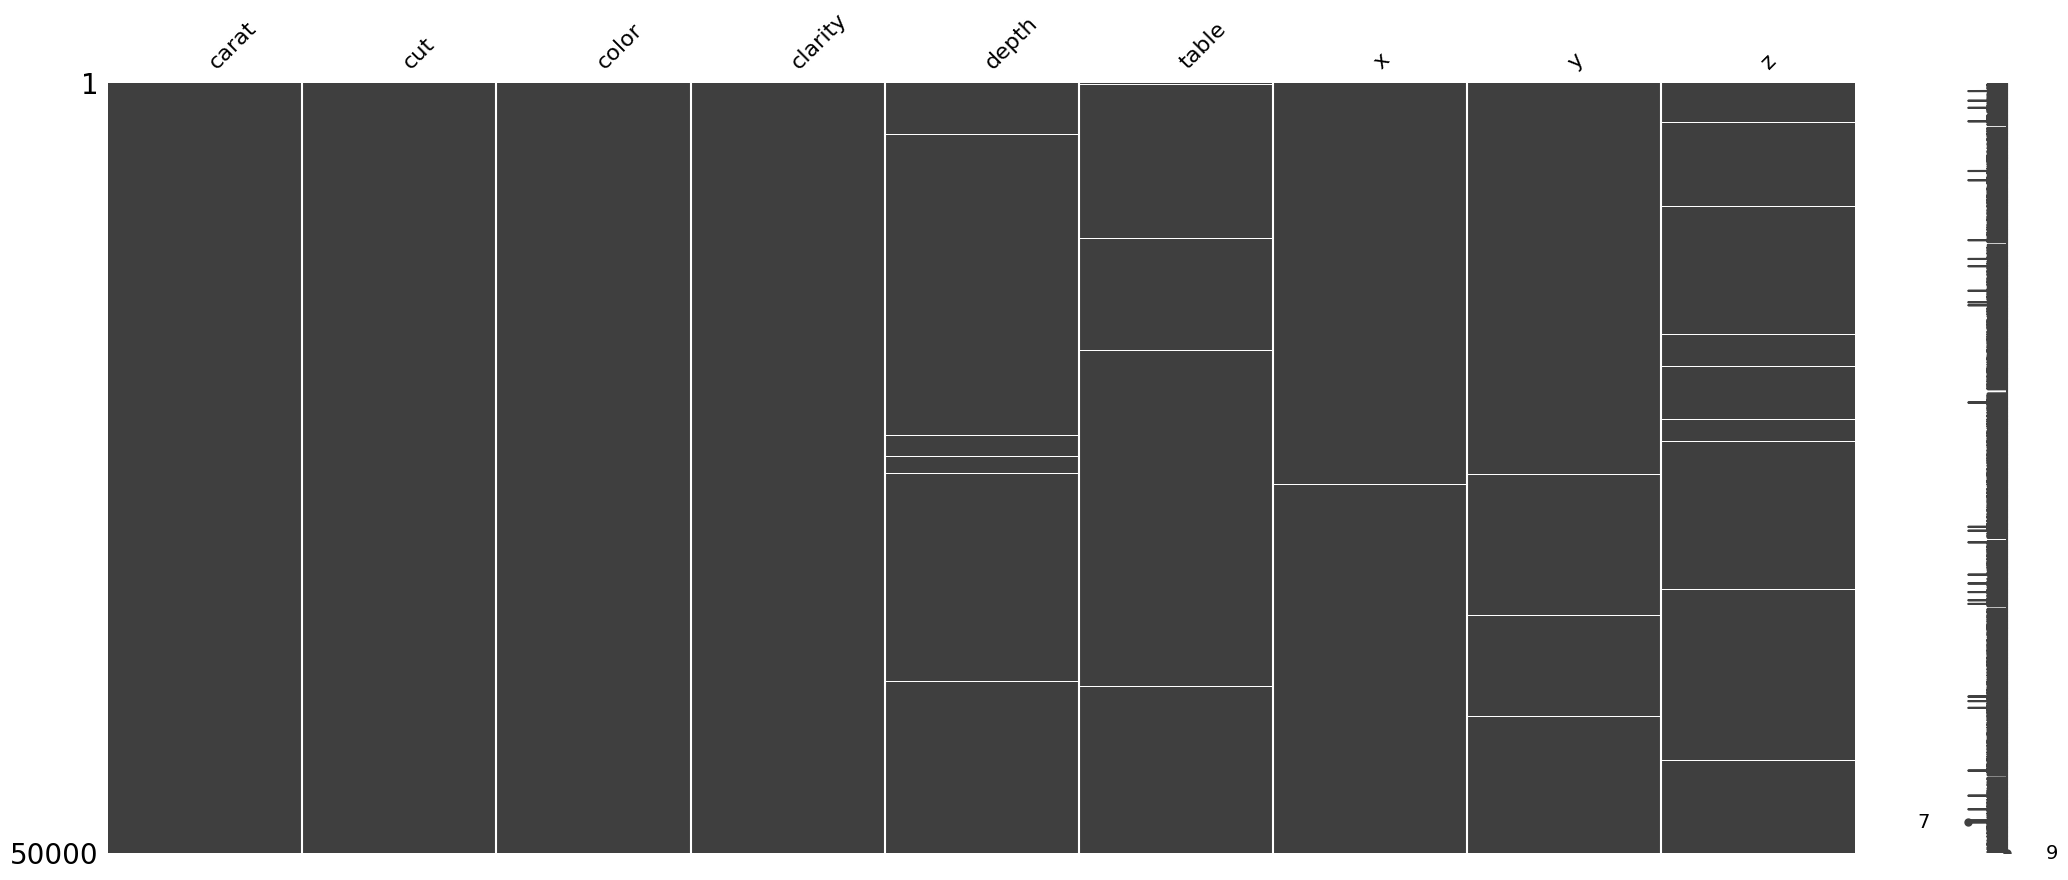

In [178]:
import missingno as msno
msno.matrix(df);

#### Удаление строк с пропущенными значениями

In [181]:
df = df.dropna()
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

#### 12.4. Выявление выбросов

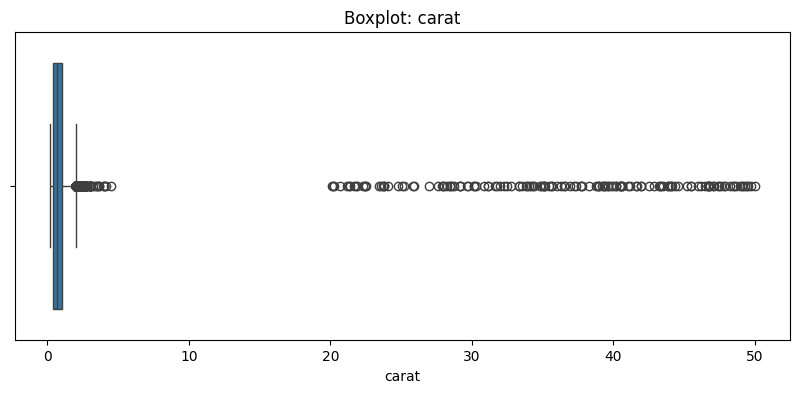

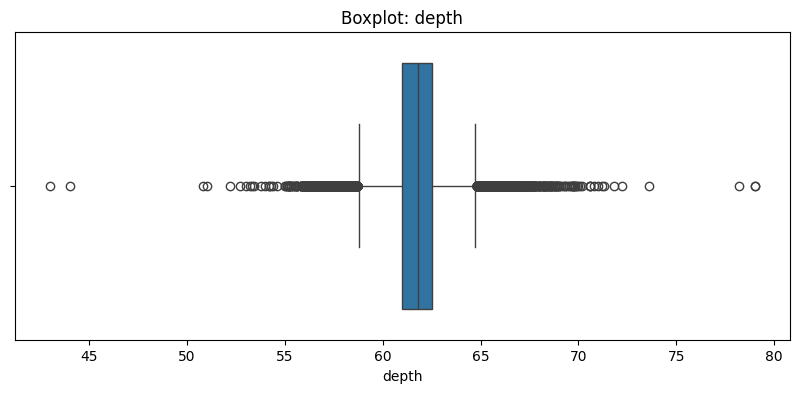

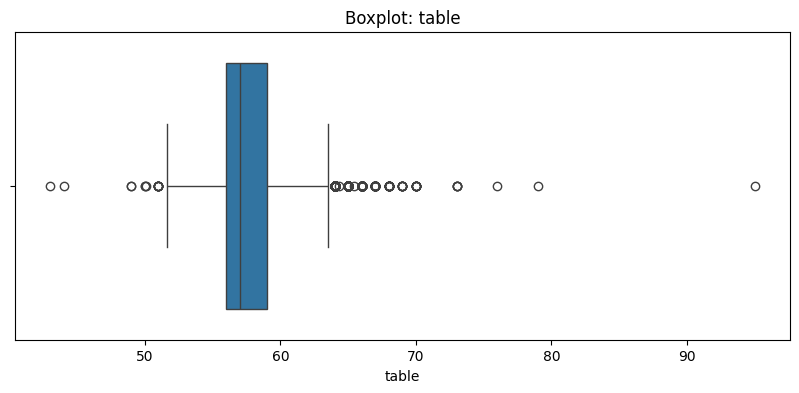

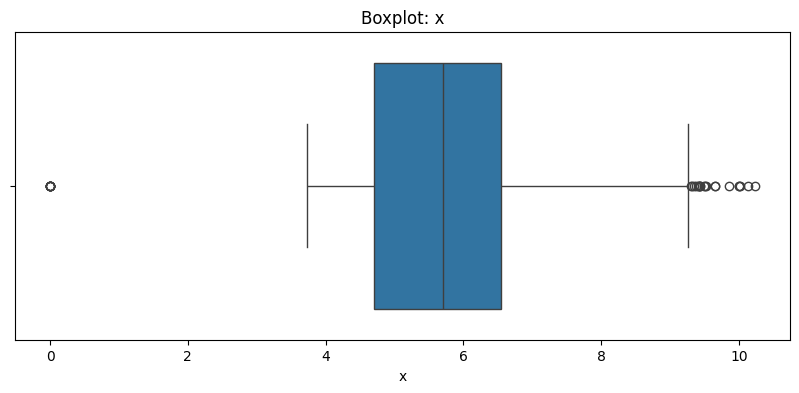

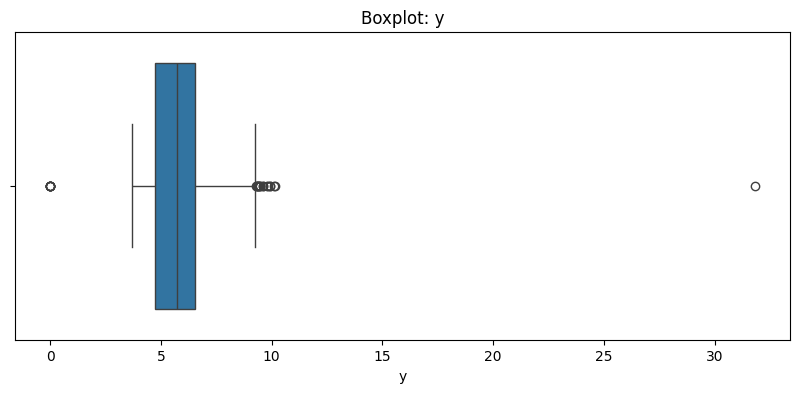

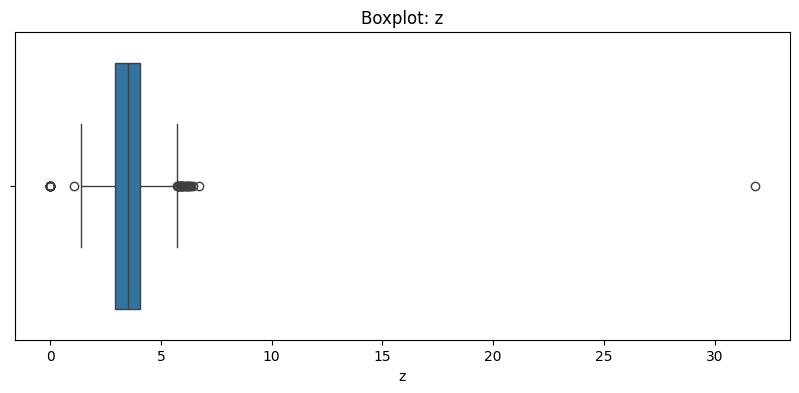

In [184]:
import seaborn as sns

numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot: {col}")
    plt.show()

#### 12.5. Удаление выбросов

In [187]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

for col in ["carat", "depth", "table", "x", "y", "z"]:
    df = remove_outliers_iqr(df, col)

df.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,1.50,Fair,G,SI1,64.5,57.0,7.15,7.09,4.59
1,0.70,Ideal,E,VS2,61.4,57.0,5.72,5.78,3.53
2,1.22,Premium,G,VS1,61.3,58.0,6.91,6.89,4.23
3,0.51,Premium,E,VS2,62.5,60.0,5.08,5.10,3.18
4,2.02,Very Good,J,SI2,59.2,60.0,8.27,8.39,4.91


#### Выбросы были удалены по признакам:
#### carat, depth, table, x, y, z.

#### 12.6. Стандартизация числовых признаков

In [192]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,1.776201,Fair,G,SI1,2.447919,-0.141333,1.432148,1.378806,1.695091
1,-0.127819,Ideal,E,VS2,-0.345564,-0.141333,0.074730,0.128209,0.066886
2,1.109794,Premium,G,VS1,-0.435676,0.352009,1.204330,1.187875,1.142116
3,-0.580024,Premium,E,VS2,0.645672,1.338693,-0.532787,-0.520956,-0.470728
4,3.013814,Very Good,J,SI2,-2.328036,1.338693,2.495301,2.619857,2.186624


#### После стандартизации признаки имеют среднее значение 0 и стандартное отклонение 1, что важно для дальнейшего анализа и моделирования.

#### 12.7. Кодирование категориальных признаков
#### cut - закодирован по шкале качества:

In [198]:
cut_mapping = {
    "Fair": 0, "Good": 1, "Very Good": 2, "Premium": 3, "Ideal": 4
}
df["cut"] = df["cut"].map(cut_mapping)

#### clarity - закодирован в порядке возрастания чистоты:

In [201]:
clarity_mapping = {
    "I1": 0, "SI2": 1, "SI1": 2, "VS2": 3,
    "VS1": 4, "VVS2": 5, "VVS1": 6, "IF": 7
}
df["clarity"] = df["clarity"].map(clarity_mapping)

df.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,1.776201,0.0,G,2,2.447919,-0.141333,1.432148,1.378806,1.695091
1,-0.127819,4.0,E,3,-0.345564,-0.141333,0.074730,0.128209,0.066886
2,1.109794,3.0,G,4,-0.435676,0.352009,1.204330,1.187875,1.142116
3,-0.580024,3.0,E,3,0.645672,1.338693,-0.532787,-0.520956,-0.470728
4,3.013814,2.0,J,1,-2.328036,1.338693,2.495301,2.619857,2.186624


#### color - закодирован с использованием pd.get_dummies():

In [220]:
df = pd.get_dummies(df, columns=["color"], drop_first=True)
df.head()

,carat,cut,clarity,depth,table,x,y,z,color_E,color_F,color_G,color_H,color_I,color_J
0,1.776201,0.0,2,2.447919,-0.141333,1.432148,1.378806,1.695091,False,False,True,False,False,False
1,-0.127819,4.0,3,-0.345564,-0.141333,0.074730,0.128209,0.066886,True,False,False,False,False,False
2,1.109794,3.0,4,-0.435676,0.352009,1.204330,1.187875,1.142116,False,False,True,False,False,False
3,-0.580024,3.0,3,0.645672,1.338693,-0.532787,-0.520956,-0.470728,True,False,False,False,False,False
4,3.013814,2.0,1,-2.328036,1.338693,2.495301,2.619857,2.186624,False,False,False,False,False,True


#### 12.8. Итоговое состояние данных
#### После проведение EDA:
    • Все пропуски устранены.
    • Выбросы удалены с использованием IQR-фильтрации.
    • Числовые признаки стандартизированы.
    • Категориальные признаки корректно закодированы.
#### Набор данных приведён к аналитически чистому и модельно-готовому виду и может использоваться для:
    • визуализации зависимостей;
    • построения предсказательных моделей;
    • расчёта корреляций и т.д.